In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(xtrain,ytrain) ,(xtest,ytest)=keras.datasets.mnist.load_data()

In [4]:
len(xtrain)

60000

In [5]:
len(xtest)

10000

In [6]:
xtrain[0].shape

(28, 28)

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

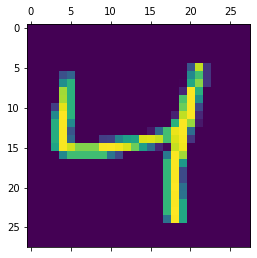

In [10]:
plt.matshow(xtrain[2])

In [11]:
ytrain[2]

1

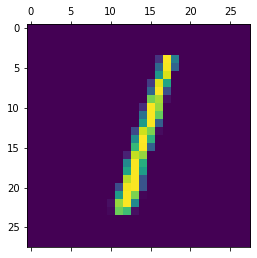

In [13]:
plt.matshow(xtest[2])

In [15]:
ytest[2]

1

In [16]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
xtrain.shape

(60000, 28, 28)

In [40]:
xtrain=xtrain/255
xtest=xtest/255

In [41]:
xtrain_flattend=xtrain.reshape(len(xtrain),28*28)
xtest_flattend=xtest.reshape(len(xtest),28*28)
 

In [42]:
xtrain_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2666 - accuracy: 0.9259


In [44]:
model.evaluate(xtest_flattend,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9258


[0.2663588225841522, 0.9258000254631042]

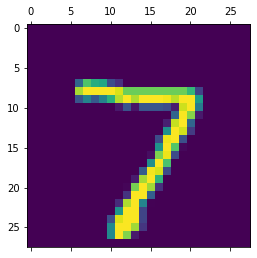

In [46]:
plt.matshow(xtest[0])

In [67]:
y_predicted=model.predict(xtest_flattend)

313/313 [==============================] - 0s 1ms/step


In [68]:
y_predicted[0]

array([1.9647252e-02, 1.3407067e-07, 5.4927673e-02, 9.5349807e-01,
       2.5802387e-03, 9.8391056e-02, 7.0797711e-07, 9.9965394e-01,
       7.2098009e-02, 6.2834466e-01], dtype=float32)

In [69]:
np.argmax(y_predicted[11])

6

In [70]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [71]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [77]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    7,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   4,    7,  922,   16,    7,    5,   13,    9,   44,    5],
       [   3,    0,   18,  917,    1,   30,    2,   10,   20,    9],
       [   1,    1,    6,    2,  916,    0,    8,    4,    8,   36],
       [   7,    1,    3,   34,    7,  790,   10,    4,   29,    7],
       [  12,    3,    6,    1,    7,   17,  908,    2,    2,    0],
       [   2,    5,   20,    7,   10,    0,    0,  945,    3,   36],
       [   6,    5,    6,   19,    9,   35,    9,   10,  867,    8],
       [  11,    7,    1,   11,   24,    8,    0,   20,    4,  923]])>

Text(69.0, 0.5, 'Truth')

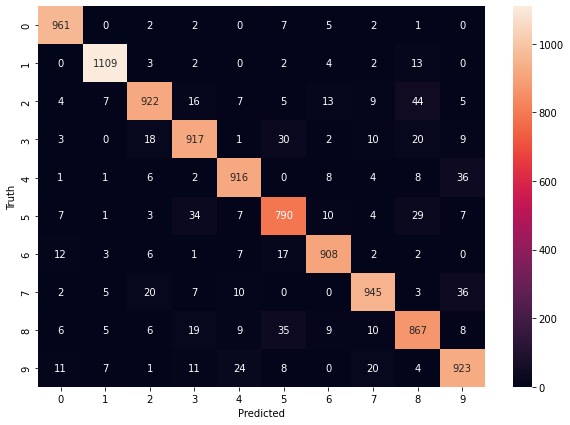

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain_flattend,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2731 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1248 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9837


In [81]:
model.evaluate(xtest_flattend,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9716


[0.09463168680667877, 0.9715999960899353]

313/313 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Truth')

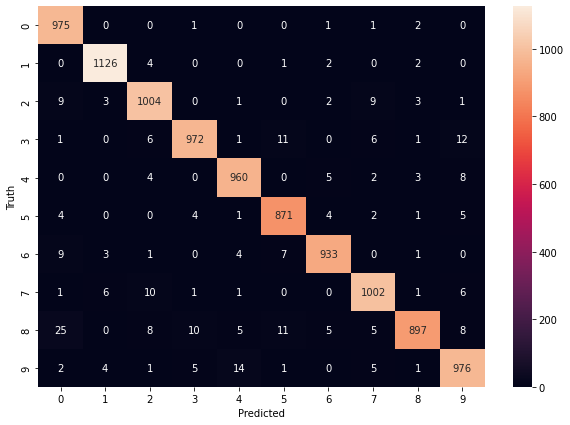

In [84]:
y_predicted=model.predict(xtest_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
    
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']


)
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1220 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9844
